# Wrange and Analyze WeRateDogs

In [1]:
#importing required libraies
import pandas as pd
import numpy as np
import requests
import tweepy
import os
import json
import time
import re
import matplotlib.pyplot as plt
import re
import seaborn as sns
import datetime
from scipy import stats
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline

# Gather Data

In [2]:
#Read csv(comma-separated)file into DataFrame
df_twitter_archive = pd.read_csv('twitter-archive-enhanced.csv')
df_twitter_archive

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,None,None,None,None
1,892177421306343426,NaN,NaN,2017-08-01 00:17:27 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,None,None,None,None
2,891815181378084864,NaN,NaN,2017-07-31 00:18:03 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891815181...,12,10,Archie,None,None,None,None
3,891689557279858688,NaN,NaN,2017-07-30 15:58:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Darla. She commenced a snooze mid meal...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891689557...,13,10,Darla,None,None,None,None
4,891327558926688256,NaN,NaN,2017-07-29 16:00:24 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Franklin. He would like you to stop ca...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891327558...,12,10,Franklin,None,None,None,None
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2351,666049248165822465,NaN,NaN,2015-11-16 00:24:50 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Here we have a 1949 1st generation vulpix. Enj...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666049248...,5,10,None,None,None,None,None
2352,666044226329800704,NaN,NaN,2015-11-16 00:04:52 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is a purebred Piers Morgan. Loves to Netf...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666044226...,6,10,a,None,None,None,None
2353,666033412701032449,NaN,NaN,2015-11-15 23:21:54 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Here is a very happy pup. Big fan of well-main...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666033412...,9,10,a,None,None,None,None
2354,666029285002620928,NaN,NaN,2015-11-15 23:05:30 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is a western brown Mitsubishi terrier. Up...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666029285...,7,10,a,None,None,None,None


In [3]:
# Downloading and saving the image prediction data using Requests
url = 'https://d17h27t6h515a5.cloudfront.net/topher/2017/August/599fd2ad_image-predictions/image-predictions.tsv' 
response = requests.get(url)
with open(os.path.join('image_predictions.tsv'), mode = 'wb') as file:
    file.write(response.content)

In [4]:
# Load the image predictions file
df_image_predictions = pd.read_csv('image_predictions.tsv', sep = '\t')
df_image_predictions

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,Welsh_springer_spaniel,0.465074,True,collie,0.156665,True,Shetland_sheepdog,0.061428,True
1,666029285002620928,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,1,redbone,0.506826,True,miniature_pinscher,0.074192,True,Rhodesian_ridgeback,0.072010,True
2,666033412701032449,https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg,1,German_shepherd,0.596461,True,malinois,0.138584,True,bloodhound,0.116197,True
3,666044226329800704,https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg,1,Rhodesian_ridgeback,0.408143,True,redbone,0.360687,True,miniature_pinscher,0.222752,True
4,666049248165822465,https://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg,1,miniature_pinscher,0.560311,True,Rottweiler,0.243682,True,Doberman,0.154629,True
...,...,...,...,...,...,...,...,...,...,...,...,...
2070,891327558926688256,https://pbs.twimg.com/media/DF6hr6BUMAAzZgT.jpg,2,basset,0.555712,True,English_springer,0.225770,True,German_short-haired_pointer,0.175219,True
2071,891689557279858688,https://pbs.twimg.com/media/DF_q7IAWsAEuuN8.jpg,1,paper_towel,0.170278,False,Labrador_retriever,0.168086,True,spatula,0.040836,False
2072,891815181378084864,https://pbs.twimg.com/media/DGBdLU1WsAANxJ9.jpg,1,Chihuahua,0.716012,True,malamute,0.078253,True,kelpie,0.031379,True
2073,892177421306343426,https://pbs.twimg.com/media/DGGmoV4XsAAUL6n.jpg,1,Chihuahua,0.323581,True,Pekinese,0.090647,True,papillon,0.068957,True


In [5]:
# Setting up the Twitter API with authentication pieces
import tweepy
consumer_key = '*********************'
consumer_secret = '******************************'
access_token = '************************'
access_secret = '************************'
auth = tweepy.OAuthHandler(consumer_key, consumer_secret)
auth.set_access_token(access_token, access_secret)
api = tweepy.API(auth, wait_on_rate_limit=True, wait_on_rate_limit_notify=True)

In [6]:
tweet = api.get_status(df_twitter_archive.tweet_id[1543], tweet_mode='extended')
#json info
j_info = tweet._json
j_info

{'created_at': 'Tue Jan 19 21:18:22 +0000 2016',
 'id': 689557536375177216,
 'id_str': '689557536375177216',
 'full_text': 'Downright majestic af 12/10 https://t.co/WFh2FEbYzj',
 'truncated': False,
 'display_text_range': [0, 51],
 'entities': {'hashtags': [],
  'symbols': [],
  'user_mentions': [],
  'urls': [],
  'media': [{'id': 689557528733163520,
    'id_str': '689557528733163520',
    'indices': [28, 51],
    'media_url': 'http://pbs.twimg.com/media/CZHM60BWIAA4AY4.jpg',
    'media_url_https': 'https://pbs.twimg.com/media/CZHM60BWIAA4AY4.jpg',
    'url': 'https://t.co/WFh2FEbYzj',
    'display_url': 'pic.twitter.com/WFh2FEbYzj',
    'expanded_url': 'https://twitter.com/dog_rates/status/689557536375177216/photo/1',
    'type': 'photo',
    'sizes': {'thumb': {'w': 150, 'h': 150, 'resize': 'crop'},
     'medium': {'w': 1024, 'h': 1024, 'resize': 'fit'},
     'small': {'w': 680, 'h': 680, 'resize': 'fit'},
     'large': {'w': 1024, 'h': 1024, 'resize': 'fit'}}}]},
 'extended_entitie

In [7]:
# Use Twitter API to collect status data on tweets present in df_twitter_archive dataframe
tweet_ids = list(df_twitter_archive['tweet_id'])

tweet_data = []
tweet_id_success = []
tweet_id_missing = []
for tweet_id in tweet_ids:
    try:
        data = api.get_status(tweet_id, 
                              tweet_mode='extended',
                              wait_on_rate_limit = True,
                              wait_on_rate_limit_notify = True)
        tweet_data.append(data)
        tweet_id_success.append(tweet_id)
    except:
        tweet_id_missing.append(tweet_id)
        print(tweet_id)

888202515573088257
873697596434513921
872668790621863937
872261713294495745
869988702071779329
866816280283807744
861769973181624320
856602993587888130
851953902622658560
845459076796616705
844704788403113984
842892208864923648
837366284874571778
837012587749474308
829374341691346946
827228250799742977
812747805718642688
802247111496568832
779123168116150273
775096608509886464
771004394259247104
770743923962707968
759566828574212096


Rate limit reached. Sleeping for: 295


754011816964026368
680055455951884288


Rate limit reached. Sleeping for: 456


# Assessing the Data

# The Twitter Archive File

In [9]:
df_twitter_archive

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,None,None,None,None
1,892177421306343426,NaN,NaN,2017-08-01 00:17:27 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,None,None,None,None
2,891815181378084864,NaN,NaN,2017-07-31 00:18:03 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891815181...,12,10,Archie,None,None,None,None
3,891689557279858688,NaN,NaN,2017-07-30 15:58:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Darla. She commenced a snooze mid meal...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891689557...,13,10,Darla,None,None,None,None
4,891327558926688256,NaN,NaN,2017-07-29 16:00:24 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Franklin. He would like you to stop ca...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891327558...,12,10,Franklin,None,None,None,None
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2351,666049248165822465,NaN,NaN,2015-11-16 00:24:50 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Here we have a 1949 1st generation vulpix. Enj...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666049248...,5,10,None,None,None,None,None
2352,666044226329800704,NaN,NaN,2015-11-16 00:04:52 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is a purebred Piers Morgan. Loves to Netf...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666044226...,6,10,a,None,None,None,None
2353,666033412701032449,NaN,NaN,2015-11-15 23:21:54 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Here is a very happy pup. Big fan of well-main...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666033412...,9,10,a,None,None,None,None
2354,666029285002620928,NaN,NaN,2015-11-15 23:05:30 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is a western brown Mitsubishi terrier. Up...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666029285...,7,10,a,None,None,None,None


In [10]:
df_twitter_archive.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2356 entries, 0 to 2355
Data columns (total 17 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   tweet_id                    2356 non-null   int64  
 1   in_reply_to_status_id       78 non-null     float64
 2   in_reply_to_user_id         78 non-null     float64
 3   timestamp                   2356 non-null   object 
 4   source                      2356 non-null   object 
 5   text                        2356 non-null   object 
 6   retweeted_status_id         181 non-null    float64
 7   retweeted_status_user_id    181 non-null    float64
 8   retweeted_status_timestamp  181 non-null    object 
 9   expanded_urls               2297 non-null   object 
 10  rating_numerator            2356 non-null   int64  
 11  rating_denominator          2356 non-null   int64  
 12  name                        2356 non-null   object 
 13  doggo                       2356 

In [11]:
df_twitter_archive['tweet_id'].value_counts()

749075273010798592    1
741099773336379392    1
798644042770751489    1
825120256414846976    1
769212283578875904    1
                     ..
715360349751484417    1
666817836334096384    1
794926597468000259    1
673705679337693185    1
700151421916807169    1
Name: tweet_id, Length: 2356, dtype: int64

In [12]:
df_twitter_archive['source'].value_counts()


<a href="http://twitter.com/download/iphone" rel="nofollow">Twitter for iPhone</a>     2221
<a href="http://vine.co" rel="nofollow">Vine - Make a Scene</a>                          91
<a href="http://twitter.com" rel="nofollow">Twitter Web Client</a>                       33
<a href="https://about.twitter.com/products/tweetdeck" rel="nofollow">TweetDeck</a>      11
Name: source, dtype: int64

In [13]:
df_twitter_archive['text'].value_counts()

This is Frank. He wears sunglasses and walks himself. 11/10 I'll never be this cool or independent https://t.co/pNNjBtHWPc                      1
This dog is never sure if he's doing the right thing. 10/10 https://t.co/GXq43zFfBu                                                             1
This is Reese and Twips. Reese protects Twips. Both think they're too good for seat belts. Simply reckless. 7/10s https://t.co/uLzRi1drVK       1
This is Alfy. You're witnessing his first watermelon experience. I think it was a success. 13/10 happy 4th Alfy 🇺🇸 https://t.co/fYP5RlutfA      1
This is Frank (pronounced "Fronq"). Too many boxing gloves, not enough passion. Frank is a lover not a fighter. 8/10 https://t.co/CpPxD28IpV    1
                                                                                                                                               ..
Never seen dog like this. Breathes heavy. Tilts head in a pattern. No bark. Shitty at fetch. Not even cordless. 1/10 https:/

In [14]:
df_twitter_archive['retweeted_status_id'].value_counts()

7.757333e+17    1
7.507196e+17    1
6.742918e+17    1
6.833919e+17    1
8.269587e+17    1
               ..
7.848260e+17    1
7.806013e+17    1
8.305833e+17    1
7.047611e+17    1
7.331095e+17    1
Name: retweeted_status_id, Length: 181, dtype: int64

In [15]:
df_twitter_archive['retweeted_status_user_id'].value_counts()


4.196984e+09    156
4.296832e+09      2
5.870972e+07      1
6.669901e+07      1
4.119842e+07      1
7.475543e+17      1
7.832140e+05      1
7.266347e+08      1
4.871977e+08      1
5.970642e+08      1
4.466750e+07      1
1.228326e+09      1
7.992370e+07      1
2.488557e+07      1
7.874618e+17      1
3.638908e+08      1
5.128045e+08      1
8.117408e+08      1
1.732729e+09      1
1.960740e+07      1
1.547674e+08      1
3.410211e+08      1
7.124572e+17      1
2.804798e+08      1
1.950368e+08      1
Name: retweeted_status_user_id, dtype: int64

In [16]:
df_twitter_archive['retweeted_status_timestamp'].value_counts()


2015-12-24 16:00:30 +0000    1
2017-05-18 01:17:25 +0000    1
2017-04-01 00:36:55 +0000    1
2016-03-24 01:11:29 +0000    1
2016-08-04 01:03:17 +0000    1
                            ..
2015-11-27 19:11:49 +0000    1
2015-11-28 03:31:48 +0000    1
2016-01-13 16:56:30 +0000    1
2017-01-04 01:05:59 +0000    1
2017-01-13 17:00:21 +0000    1
Name: retweeted_status_timestamp, Length: 181, dtype: int64

In [17]:
df_twitter_archive['expanded_urls'].value_counts()

https://twitter.com/dog_rates/status/771380798096281600/photo/1,https://twitter.com/dog_rates/status/771380798096281600/photo/1,https://twitter.com/dog_rates/status/771380798096281600/photo/1,https://twitter.com/dog_rates/status/771380798096281600/photo/1    2
https://twitter.com/dog_rates/status/667866724293877760/photo/1                                                                                                                                                                                                    2
https://twitter.com/dog_rates/status/866334964761202691/photo/1,https://twitter.com/dog_rates/status/866334964761202691/photo/1                                                                                                                                    2
https://twitter.com/dog_rates/status/768193404517830656/photo/1                                                                                                                                                          

In [18]:
df_twitter_archive['rating_numerator'].value_counts()

12      558
11      464
10      461
13      351
9       158
8       102
7        55
14       54
5        37
6        32
3        19
4        17
1         9
2         9
420       2
0         2
15        2
75        2
80        1
20        1
24        1
26        1
44        1
50        1
60        1
165       1
84        1
88        1
144       1
182       1
143       1
666       1
960       1
1776      1
17        1
27        1
45        1
99        1
121       1
204       1
Name: rating_numerator, dtype: int64

In [19]:
df_twitter_archive['rating_denominator'].value_counts()

10     2333
11        3
50        3
80        2
20        2
2         1
16        1
40        1
70        1
15        1
90        1
110       1
120       1
130       1
150       1
170       1
7         1
0         1
Name: rating_denominator, dtype: int64

In [20]:
df_twitter_archive['name'].value_counts()

None       745
a           55
Charlie     12
Oliver      11
Cooper      11
          ... 
Tito         1
Dido         1
Sandra       1
Chaz         1
Fwed         1
Name: name, Length: 957, dtype: int64

In [21]:
df_twitter_archive['doggo'].value_counts()

None     2259
doggo      97
Name: doggo, dtype: int64

In [22]:
df_twitter_archive['floofer'].value_counts()

None       2346
floofer      10
Name: floofer, dtype: int64

In [23]:
df_twitter_archive['pupper'].value_counts()

None      2099
pupper     257
Name: pupper, dtype: int64

In [24]:
df_twitter_archive['puppo'].value_counts()

None     2326
puppo      30
Name: puppo, dtype: int64

# JSON File

In [25]:
j_info['favorite_count']



1993

In [26]:
j_info['user']['followers_count']



8920628

In [27]:
tweet_ids = list(df_twitter_archive['tweet_id'])


In [28]:
t = time.process_time()

with open('tweet_json.txt', 'w') as file:
    for tweet_id in tweet_ids:
        try:
            tweet = api.get_status(tweet_id, tweet_mode = 'extended')
            json.dump(tweet._json, file)
            file.write('\n')
            print(tweet_id)
        except Exception as e:
            print(e)

elapsed_time = time.process_time() - t
print(elapsed_time)

892420643555336193
892177421306343426
891815181378084864
891689557279858688
891327558926688256
891087950875897856
890971913173991426
890729181411237888
890609185150312448
890240255349198849
890006608113172480
889880896479866881
889665388333682689
889638837579907072
889531135344209921
889278841981685760
888917238123831296
888804989199671297
888554962724278272
[{'code': 144, 'message': 'No status found with that ID.'}]
888078434458587136
887705289381826560
887517139158093824
887473957103951883
887343217045368832
887101392804085760
886983233522544640
886736880519319552
886680336477933568
886366144734445568
886267009285017600
886258384151887873
886054160059072513
885984800019947520
885528943205470208
885518971528720385
885311592912609280
885167619883638784
884925521741709313
884876753390489601
884562892145688576
884441805382717440
884247878851493888
884162670584377345
883838122936631299
883482846933004288
883360690899218434
883117836046086144
882992080364220416
882762694511734784
882627270

Rate limit reached. Sleeping for: 257


832040443403784192
832032802820481025
831939777352105988
831926988323639298
831911600680497154
831670449226514432
831650051525054464
831552930092285952
831322785565769729
831315979191906304
831309418084069378
831262627380748289
830956169170665475
830583320585068544
830173239259324417
830097400375152640
829878982036299777
829861396166877184
829501995190984704
829449946868879360
[{'code': 144, 'message': 'No status found with that ID.'}]
829141528400556032
829011960981237760
828801551087042563
828770345708580865
828708714936930305
828650029636317184
828409743546925057
828408677031882754
828381636999917570
828376505180889089
828372645993398273
828361771580813312
828046555563323392
828011680017821696
827933404142436356
827653905312006145
827600520311402496
827324948884643840
[{'code': 144, 'message': 'No status found with that ID.'}]
827199976799354881
826958653328592898
826848821049180160
826615380357632002
826598799820865537
826598365270007810
826476773533745153
826240494070030336
826204

777953400541634568
777885040357281792
777684233540206592
777641927919427584
777621514455814149
777189768882946048
776819012571455488
776813020089548800
776477788987613185
776249906839351296
776218204058357768
776201521193218049
776113305656188928
776088319444877312
775898661951791106
775842724423557120
775733305207554048
775729183532220416
775364825476165632
775350846108426240
[{'code': 144, 'message': 'No status found with that ID.'}]
775085132600442880
774757898236878852
774639387460112384
774314403806253056
773985732834758656
773922284943896577
773704687002451968
773670353721753600
773547596996571136
773336787167145985
773308824254029826
773247561583001600
773191612633579521
772877495989305348
772826264096874500
772615324260794368
772581559778025472
772193107915964416
772152991789019136
772117678702071809
772114945936949249
772102971039580160
771908950375665664
771770456517009408
771500966810099713
771380798096281600
771171053431250945
771136648247640064
771102124360998913
771014301

718631497683582976
718613305783398402
718540630683709445
718460005985447936
718454725339934721
718246886998687744
718234618122661888
717841801130979328
717790033953034240
717537687239008257
717428917016076293
717421804990701568
717047459982213120
717009362452090881
716802964044845056
716791146589110272
716730379797970944
716447146686459905
716439118184652801
716285507865542656
716080869887381504
715928423106027520
715758151270801409
715733265223708672
715704790270025728
715696743237730304
715680795826982913
715360349751484417
715342466308784130
715220193576927233
715200624753819648
715009755312439296
714982300363173890
714962719905021952
714957620017307648
714631576617938945
714606013974974464
714485234495041536
714258258790387713
714251586676113411
714214115368108032
714141408463036416
713919462244790272
713909862279876608
713900603437621249
713761197720473600
713411074226274305
713177543487135744
713175907180089344
712809025985978368
712717840512598017
712668654853337088
712438159032

Rate limit reached. Sleeping for: 458


711968124745228288
711743778164514816
711732680602345472
711694788429553666
711652651650457602
711363825979756544
711306686208872448
711008018775851008
710997087345876993
710844581445812225
710833117892898816
710658690886586372
710609963652087808
710588934686908417
710296729921429505
710283270106132480
710272297844797440
710269109699739648
710153181850935296
710140971284037632
710117014656950272
709918798883774466
709901256215666688
709852847387627521
709566166965075968
709556954897764353
709519240576036864
709449600415961088
709409458133323776
709225125749587968
709207347839836162
709198395643068416
709179584944730112
709158332880297985
709042156699303936
708853462201716736
708845821941387268
708834316713893888
708810915978854401
708738143638450176
708711088997666817
708479650088034305
708469915515297792
708400866336894977
708356463048204288
708349470027751425
708149363256774660
708130923141795840
708119489313951744
708109389455101952
708026248782585858
707995814724026368
707983188426

682242692827447297
682088079302213632
682059653698686977
682047327939461121
682032003584274432
682003177596559360
681981167097122816
681891461017812993
681694085539872773
681679526984871937
681654059175129088
681610798867845120
Failed to send request: ('Connection aborted.', ConnectionResetError(10054, 'An existing connection was forcibly closed by the remote host', None, 10054, None))
681523177663676416
681340665377193984
681339448655802368
681320187870711809
681302363064414209
681297372102656000
681281657291280384
681261549936340994
681242418453299201
681231109724700672
681193455364796417
680970795137544192
680959110691590145
680940246314430465
680934982542561280
680913438424612864
680889648562991104
680836378243002368
680805554198020098
680801747103793152
680798457301471234
680609293079592961
680583894916304897
680497766108381184
680494726643068929
680473011644985345
680440374763077632
680221482581123072
680206703334408192
680191257256136705
680176173301628928
680161097740095489
680

670733412878163972
670727704916926465
670717338665226240
670704688707301377
670691627984359425
670679630144274432
670676092097810432
670668383499735048
670474236058800128
670468609693655041
670465786746662913
670452855871037440
670449342516494336
670444955656130560
670442337873600512
670435821946826752
670434127938719744
670433248821026816
670428280563085312
670427002554466305
670421925039075328
670420569653809152
670417414769758208
670411370698022913
670408998013820928
670403879788544000
670385711116361728
670374371102445568
670361874861563904
670338931251150849
670319130621435904
670303360680108032
670290420111441920
670093938074779648
670086499208155136
670079681849372674
670073503555706880
670069087419133954
670061506722140161
670055038660800512
670046952931721218
670040295598354432
670037189829525505
670003130994700288
669993076832759809
669972011175813120
669970042633789440


Rate limit reached. Sleeping for: 458


Failed to send request: ('Connection aborted.', ConnectionResetError(10054, 'An existing connection was forcibly closed by the remote host', None, 10054, None))
669926384437997569
669923323644657664
669753178989142016
669749430875258880
669684865554620416
669683899023405056
669682095984410625
669680153564442624
669661792646373376
669625907762618368
669603084620980224
669597912108789760
669583744538451968
669573570759163904
669571471778410496
669567591774625800
669564461267722241
669393256313184256
669375718304980992
669371483794317312
669367896104181761
669363888236994561
669359674819481600
669354382627049472
669353438988365824
669351434509529089
669328503091937280
669327207240699904
669324657376567296
669216679721873412
669214165781868544
669203728096960512
669037058363662336
669015743032369152
669006782128353280
669000397445533696
668994913074286592
668992363537309700
668989615043424256
668988183816871936
668986018524233728
668981893510119424
668979806671884288
668975677807423489
668

In [31]:
df_list = []

with open('tweet_json.txt', 'r', encoding='utf8') as f:
    for line in f:
        tweet_line = json.loads(line)
        df_list.append({'favorites': tweet_line['favorite_count'],
                       'retweets': tweet_line['retweet_count'],
                       'followers_count': tweet_line['user']['followers_count'],
                       'tweet_id': tweet_line['id']})

twitter_api = pd.DataFrame(df_list)
print(twitter_api)

      favorites  retweets  followers_count            tweet_id
0         35292      7451          8920718  892420643555336193
1         30538      5534          8920718  892177421306343426
2         22987      3660          8920718  891815181378084864
3         38583      7624          8920718  891689557279858688
4         36867      8218          8920718  891327558926688256
...         ...       ...              ...                 ...
2324         95        39          8921445  666049248165822465
2325        262       124          8921445  666044226329800704
2326        108        39          8920791  666033412701032449
2327        118        41          8921445  666029285002620928
2328       2355       446          8920791  666020888022790149

[2329 rows x 4 columns]


In [30]:
twitter_api

,favorites,retweets,followers_count,tweet_id
0,35292,7451,8920718,892420643555336193
1,30538,5534,8920718,892177421306343426
2,22987,3660,8920718,891815181378084864
3,38583,7624,8920718,891689557279858688
4,36867,8218,8920718,891327558926688256
...,...,...,...,...
2324,95,39,8921445,666049248165822465
2325,262,124,8921445,666044226329800704
2326,108,39,8920791,666033412701032449
2327,118,41,8921445,666029285002620928


In [32]:
df_image_predictions

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,Welsh_springer_spaniel,0.465074,True,collie,0.156665,True,Shetland_sheepdog,0.061428,True
1,666029285002620928,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,1,redbone,0.506826,True,miniature_pinscher,0.074192,True,Rhodesian_ridgeback,0.072010,True
2,666033412701032449,https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg,1,German_shepherd,0.596461,True,malinois,0.138584,True,bloodhound,0.116197,True
3,666044226329800704,https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg,1,Rhodesian_ridgeback,0.408143,True,redbone,0.360687,True,miniature_pinscher,0.222752,True
4,666049248165822465,https://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg,1,miniature_pinscher,0.560311,True,Rottweiler,0.243682,True,Doberman,0.154629,True
...,...,...,...,...,...,...,...,...,...,...,...,...
2070,891327558926688256,https://pbs.twimg.com/media/DF6hr6BUMAAzZgT.jpg,2,basset,0.555712,True,English_springer,0.225770,True,German_short-haired_pointer,0.175219,True
2071,891689557279858688,https://pbs.twimg.com/media/DF_q7IAWsAEuuN8.jpg,1,paper_towel,0.170278,False,Labrador_retriever,0.168086,True,spatula,0.040836,False
2072,891815181378084864,https://pbs.twimg.com/media/DGBdLU1WsAANxJ9.jpg,1,Chihuahua,0.716012,True,malamute,0.078253,True,kelpie,0.031379,True
2073,892177421306343426,https://pbs.twimg.com/media/DGGmoV4XsAAUL6n.jpg,1,Chihuahua,0.323581,True,Pekinese,0.090647,True,papillon,0.068957,True


In [33]:
df_twitter_archive

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,None,None,None,None
1,892177421306343426,NaN,NaN,2017-08-01 00:17:27 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,None,None,None,None
2,891815181378084864,NaN,NaN,2017-07-31 00:18:03 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891815181...,12,10,Archie,None,None,None,None
3,891689557279858688,NaN,NaN,2017-07-30 15:58:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Darla. She commenced a snooze mid meal...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891689557...,13,10,Darla,None,None,None,None
4,891327558926688256,NaN,NaN,2017-07-29 16:00:24 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Franklin. He would like you to stop ca...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891327558...,12,10,Franklin,None,None,None,None
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2351,666049248165822465,NaN,NaN,2015-11-16 00:24:50 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Here we have a 1949 1st generation vulpix. Enj...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666049248...,5,10,None,None,None,None,None
2352,666044226329800704,NaN,NaN,2015-11-16 00:04:52 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is a purebred Piers Morgan. Loves to Netf...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666044226...,6,10,a,None,None,None,None
2353,666033412701032449,NaN,NaN,2015-11-15 23:21:54 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Here is a very happy pup. Big fan of well-main...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666033412...,9,10,a,None,None,None,None
2354,666029285002620928,NaN,NaN,2015-11-15 23:05:30 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is a western brown Mitsubishi terrier. Up...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666029285...,7,10,a,None,None,None,None


In [34]:
twitter_api.head()

,favorites,retweets,followers_count,tweet_id
0,35292,7451,8920718,892420643555336193
1,30538,5534,8920718,892177421306343426
2,22987,3660,8920718,891815181378084864
3,38583,7624,8920718,891689557279858688
4,36867,8218,8920718,891327558926688256


In [35]:
twitter_api.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2329 entries, 0 to 2328
Data columns (total 4 columns):
 #   Column           Non-Null Count  Dtype
---  ------           --------------  -----
 0   favorites        2329 non-null   int64
 1   retweets         2329 non-null   int64
 2   followers_count  2329 non-null   int64
 3   tweet_id         2329 non-null   int64
dtypes: int64(4)
memory usage: 72.8 KB


In [36]:
twitter_api.sample(4)

,favorites,retweets,followers_count,tweet_id
539,10889,4114,8920731,803638050916102144
1086,3559,987,8920744,733822306246479872
716,8336,2047,8920734,781251288990355457
1711,4615,1993,8920754,679530280114372609


# Twitter Archive File

In [37]:
df_twitter_archive.head()

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,None,None,None,None
1,892177421306343426,NaN,NaN,2017-08-01 00:17:27 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,None,None,None,None
2,891815181378084864,NaN,NaN,2017-07-31 00:18:03 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891815181...,12,10,Archie,None,None,None,None
3,891689557279858688,NaN,NaN,2017-07-30 15:58:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Darla. She commenced a snooze mid meal...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891689557...,13,10,Darla,None,None,None,None
4,891327558926688256,NaN,NaN,2017-07-29 16:00:24 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Franklin. He would like you to stop ca...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891327558...,12,10,Franklin,None,None,None,None


In [38]:
df_twitter_archive.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2356 entries, 0 to 2355
Data columns (total 17 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   tweet_id                    2356 non-null   int64  
 1   in_reply_to_status_id       78 non-null     float64
 2   in_reply_to_user_id         78 non-null     float64
 3   timestamp                   2356 non-null   object 
 4   source                      2356 non-null   object 
 5   text                        2356 non-null   object 
 6   retweeted_status_id         181 non-null    float64
 7   retweeted_status_user_id    181 non-null    float64
 8   retweeted_status_timestamp  181 non-null    object 
 9   expanded_urls               2297 non-null   object 
 10  rating_numerator            2356 non-null   int64  
 11  rating_denominator          2356 non-null   int64  
 12  name                        2356 non-null   object 
 13  doggo                       2356 

In [39]:
df_twitter_archive.tweet_id.duplicated().sum()

0

In [40]:
# appears that there are no null values for name, doggo, floofer, pupper or puppo

In [41]:
df_twitter_archive.name.value_counts()

None       745
a           55
Charlie     12
Oliver      11
Cooper      11
          ... 
Tito         1
Dido         1
Sandra       1
Chaz         1
Fwed         1
Name: name, Length: 957, dtype: int64

In [42]:
df_twitter_archive.expanded_urls.isnull().value_counts()

False    2297
True       59
Name: expanded_urls, dtype: int64

In [43]:
#Check for ones with retweets
len(df_twitter_archive[df_twitter_archive['text'].str.startswith('RT') == True])

183

In [44]:
#Check for tweets with no image
df_twitter_archive['expanded_urls'].isnull().value_counts()

False    2297
True       59
Name: expanded_urls, dtype: int64

# Image Prediction file

In [45]:
df_image_predictions.head()

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,Welsh_springer_spaniel,0.465074,True,collie,0.156665,True,Shetland_sheepdog,0.061428,True
1,666029285002620928,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,1,redbone,0.506826,True,miniature_pinscher,0.074192,True,Rhodesian_ridgeback,0.072010,True
2,666033412701032449,https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg,1,German_shepherd,0.596461,True,malinois,0.138584,True,bloodhound,0.116197,True
3,666044226329800704,https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg,1,Rhodesian_ridgeback,0.408143,True,redbone,0.360687,True,miniature_pinscher,0.222752,True
4,666049248165822465,https://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg,1,miniature_pinscher,0.560311,True,Rottweiler,0.243682,True,Doberman,0.154629,True


In [46]:
df_image_predictions.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2075 entries, 0 to 2074
Data columns (total 12 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   tweet_id  2075 non-null   int64  
 1   jpg_url   2075 non-null   object 
 2   img_num   2075 non-null   int64  
 3   p1        2075 non-null   object 
 4   p1_conf   2075 non-null   float64
 5   p1_dog    2075 non-null   bool   
 6   p2        2075 non-null   object 
 7   p2_conf   2075 non-null   float64
 8   p2_dog    2075 non-null   bool   
 9   p3        2075 non-null   object 
 10  p3_conf   2075 non-null   float64
 11  p3_dog    2075 non-null   bool   
dtypes: bool(3), float64(3), int64(2), object(4)
memory usage: 119.6+ KB


In [47]:
df_image_predictions.p1.value_counts()

golden_retriever      150
Labrador_retriever    100
Pembroke               89
Chihuahua              83
pug                    57
                     ... 
electric_fan            1
king_penguin            1
binoculars              1
book_jacket             1
cheeseburger            1
Name: p1, Length: 378, dtype: int64

# Clean the Data

In [48]:
#Make copies of the originals
archive_clean = df_twitter_archive.copy()
predictions_clean = df_image_predictions.copy()
api_dataclean = twitter_api.copy()

# Tidiness Issue #1

Use .merge() to create one large dataframe from the three available dataframes

# code

In [49]:
# Join archive_clean and api_dataclean
df = pd.merge(archive_clean, api_dataclean, left_on = 'tweet_id', right_on = 'tweet_id', how='inner')

#Join predictions_clean to df
master = pd.merge(df, predictions_clean, left_on = 'tweet_id', right_on = 'tweet_id', how = 'inner')

# Test

In [50]:
#Inspect the merge
master.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2057 entries, 0 to 2056
Data columns (total 31 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   tweet_id                    2057 non-null   int64  
 1   in_reply_to_status_id       23 non-null     float64
 2   in_reply_to_user_id         23 non-null     float64
 3   timestamp                   2057 non-null   object 
 4   source                      2057 non-null   object 
 5   text                        2057 non-null   object 
 6   retweeted_status_id         72 non-null     float64
 7   retweeted_status_user_id    72 non-null     float64
 8   retweeted_status_timestamp  72 non-null     object 
 9   expanded_urls               2057 non-null   object 
 10  rating_numerator            2057 non-null   int64  
 11  rating_denominator          2057 non-null   int64  
 12  name                        2057 non-null   object 
 13  doggo                       2057 

In [51]:
master.head()


,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,...,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892420643...,...,1,orange,0.097049,False,bagel,0.085851,False,banana,0.076110,False
1,892177421306343426,NaN,NaN,2017-08-01 00:17:27 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892177421...,...,1,Chihuahua,0.323581,True,Pekinese,0.090647,True,papillon,0.068957,True
2,891815181378084864,NaN,NaN,2017-07-31 00:18:03 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891815181...,...,1,Chihuahua,0.716012,True,malamute,0.078253,True,kelpie,0.031379,True
3,891689557279858688,NaN,NaN,2017-07-30 15:58:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Darla. She commenced a snooze mid meal...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891689557...,...,1,paper_towel,0.170278,False,Labrador_retriever,0.168086,True,spatula,0.040836,False
4,891327558926688256,NaN,NaN,2017-07-29 16:00:24 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Franklin. He would like you to stop ca...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891327558...,...,2,basset,0.555712,True,English_springer,0.225770,True,German_short-haired_pointer,0.175219,True


# Tidiness Issue #2
To create Tidy Data, the four columns to indicate the stage of life for a dog should be moved to only one column, named 'dog_stages

# Code

In [52]:
#First, change "None" text in dog stages to NaN
master.doggo.replace('None', '', inplace = True)
master.floofer.replace('None', '', inplace = True)
master.puppo.replace('None', '', inplace = True)
master.pupper.replace('None', '', inplace = True)

In [53]:
#create the single column
master['dog_stages'] = master.doggo + master.floofer + master.pupper + master.puppo

In [54]:
#an example of a tweet containing two life stages
master.query('tweet_id == 759793422261743616')

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,...,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog,dog_stages
711,759793422261743616,NaN,NaN,2016-07-31 16:50:42 +0000,"<a href=""http://twitter.com/download/iphone"" r...","Meet Maggie &amp; Lila. Maggie is the doggo, L...",NaN,NaN,NaN,https://twitter.com/dog_rates/status/759793422...,...,golden_retriever,0.985876,True,Labrador_retriever,0.001948,True,kuvasz,0.001752,True,doggopupper


In [55]:
#special categories for dogs with multiple stages
master.loc[master.dog_stages == 'doggopupper', 'dog_stages'] = 'doggo,pupper'
master.loc[master.dog_stages == 'doggopuppo', 'dog_stages'] = 'doggo,puppo'
master.loc[master.dog_stages == 'doggofloofer', 'dog_stages'] = 'doggo,floofer'

In [56]:
master.drop(['floofer', 'puppo', 'doggo', 'pupper'], axis = 1, inplace = True)

# Test

In [57]:
master.sample(8)

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,...,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog,dog_stages
204,842846295480000512,NaN,NaN,2017-03-17 21:13:10 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Charlie. He's wishing you a very fun a...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/842846295...,...,Labrador_retriever,0.461076,True,golden_retriever,0.154946,True,Chihuahua,0.110249,True,
1042,709918798883774466,NaN,NaN,2016-03-16 01:46:45 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Meet Watson. He's a Suzuki Tickleboop. Leader ...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/709918798...,...,Pembroke,0.956222,True,Cardigan,0.020727,True,Chihuahua,0.007912,True,
608,777189768882946048,NaN,NaN,2016-09-17 16:57:35 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Jeffrey. He's being held so he doesn't...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/777189768...,...,Chihuahua,0.988412,True,Mexican_hairless,0.004177,True,hog,0.001507,False,
1203,696754882863349760,NaN,NaN,2016-02-08 17:58:03 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Reptar. He specifically asked for his ...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/696754882...,...,weasel,0.137832,False,toy_poodle,0.098378,True,Scottish_deerhound,0.097397,True,
1561,675781562965868544,NaN,NaN,2015-12-12 20:57:34 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Say hello to Buddah. He was Waldo for Hallowee...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/675781562...,...,Maltese_dog,0.921968,True,West_Highland_white_terrier,0.017811,True,toy_poodle,0.013555,True,
378,814638523311648768,NaN,NaN,2016-12-30 01:05:33 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Olivia. She's a passionate advocate of...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/814638523...,...,golden_retriever,0.650814,True,kuvasz,0.053281,True,cocker_spaniel,0.035440,True,
1866,669393256313184256,NaN,NaN,2015-11-25 05:52:43 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Meet Ronduh. She's a Finnish Checkered Blitzkr...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/669393256...,...,cocker_spaniel,0.359843,True,Blenheim_spaniel,0.139519,True,toy_poodle,0.132746,True,
541,788070120937619456,NaN,NaN,2016-10-17 17:32:13 +0000,"<a href=""http://twitter.com/download/iphone"" r...",RT @dog_rates: This is Bo and Ty. Bo eats pape...,7.610045e+17,4.196984e+09,2016-08-04 01:03:17 +0000,https://twitter.com/dog_rates/status/761004547...,...,golden_retriever,0.735163,True,Sussex_spaniel,0.064897,True,Labrador_retriever,0.047704,True,


In [58]:
master.dog_stages.value_counts()

                 1739
pupper            210
doggo              65
puppo              23
doggo,pupper       11
floofer             7
doggo,floofer       1
doggo,puppo         1
Name: dog_stages, dtype: int64

In [59]:
master.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2057 entries, 0 to 2056
Data columns (total 28 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   tweet_id                    2057 non-null   int64  
 1   in_reply_to_status_id       23 non-null     float64
 2   in_reply_to_user_id         23 non-null     float64
 3   timestamp                   2057 non-null   object 
 4   source                      2057 non-null   object 
 5   text                        2057 non-null   object 
 6   retweeted_status_id         72 non-null     float64
 7   retweeted_status_user_id    72 non-null     float64
 8   retweeted_status_timestamp  72 non-null     object 
 9   expanded_urls               2057 non-null   object 
 10  rating_numerator            2057 non-null   int64  
 11  rating_denominator          2057 non-null   int64  
 12  name                        2057 non-null   object 
 13  favorites                   2057 

# Quality Issue #1

# Delete extraneous columns

# Code

In [60]:
#a reminder of the columns
master.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2057 entries, 0 to 2056
Data columns (total 28 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   tweet_id                    2057 non-null   int64  
 1   in_reply_to_status_id       23 non-null     float64
 2   in_reply_to_user_id         23 non-null     float64
 3   timestamp                   2057 non-null   object 
 4   source                      2057 non-null   object 
 5   text                        2057 non-null   object 
 6   retweeted_status_id         72 non-null     float64
 7   retweeted_status_user_id    72 non-null     float64
 8   retweeted_status_timestamp  72 non-null     object 
 9   expanded_urls               2057 non-null   object 
 10  rating_numerator            2057 non-null   int64  
 11  rating_denominator          2057 non-null   int64  
 12  name                        2057 non-null   object 
 13  favorites                   2057 

In [61]:
master.drop(['in_reply_to_status_id', 'in_reply_to_user_id', 'source', 'retweeted_status_id', 'retweeted_status_user_id', 'retweeted_status_timestamp', 'p2_conf', 'p2_dog', 'p3_conf', 'p3_dog'], axis = 1, inplace = True)

# Test



In [62]:
master.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2057 entries, 0 to 2056
Data columns (total 18 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   tweet_id            2057 non-null   int64  
 1   timestamp           2057 non-null   object 
 2   text                2057 non-null   object 
 3   expanded_urls       2057 non-null   object 
 4   rating_numerator    2057 non-null   int64  
 5   rating_denominator  2057 non-null   int64  
 6   name                2057 non-null   object 
 7   favorites           2057 non-null   int64  
 8   retweets            2057 non-null   int64  
 9   followers_count     2057 non-null   int64  
 10  jpg_url             2057 non-null   object 
 11  img_num             2057 non-null   int64  
 12  p1                  2057 non-null   object 
 13  p1_conf             2057 non-null   float64
 14  p1_dog              2057 non-null   bool   
 15  p2                  2057 non-null   object 
 16  p3    

# Quality Issue #2

# Change data types for 'tweet_id' to string

# code

In [63]:
master['tweet_id'] = master['tweet_id'].astype(str)

# Test

In [64]:
master.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2057 entries, 0 to 2056
Data columns (total 18 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   tweet_id            2057 non-null   object 
 1   timestamp           2057 non-null   object 
 2   text                2057 non-null   object 
 3   expanded_urls       2057 non-null   object 
 4   rating_numerator    2057 non-null   int64  
 5   rating_denominator  2057 non-null   int64  
 6   name                2057 non-null   object 
 7   favorites           2057 non-null   int64  
 8   retweets            2057 non-null   int64  
 9   followers_count     2057 non-null   int64  
 10  jpg_url             2057 non-null   object 
 11  img_num             2057 non-null   int64  
 12  p1                  2057 non-null   object 
 13  p1_conf             2057 non-null   float64
 14  p1_dog              2057 non-null   bool   
 15  p2                  2057 non-null   object 
 16  p3    

# Quality Issue #3

# Change 'timestamp' to datetime

# Code



In [65]:
master['timestamp'] = pd.to_datetime(master['timestamp'])

# Test



In [66]:
master.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2057 entries, 0 to 2056
Data columns (total 18 columns):
 #   Column              Non-Null Count  Dtype              
---  ------              --------------  -----              
 0   tweet_id            2057 non-null   object             
 1   timestamp           2057 non-null   datetime64[ns, UTC]
 2   text                2057 non-null   object             
 3   expanded_urls       2057 non-null   object             
 4   rating_numerator    2057 non-null   int64              
 5   rating_denominator  2057 non-null   int64              
 6   name                2057 non-null   object             
 7   favorites           2057 non-null   int64              
 8   retweets            2057 non-null   int64              
 9   followers_count     2057 non-null   int64              
 10  jpg_url             2057 non-null   object             
 11  img_num             2057 non-null   int64              
 12  p1                  2057 non-null 

In [67]:
master.head()

,tweet_id,timestamp,text,expanded_urls,rating_numerator,rating_denominator,name,favorites,retweets,followers_count,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p3,dog_stages
0,892420643555336193,2017-08-01 16:23:56+00:00,This is Phineas. He's a mystical boy. Only eve...,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,35292,7451,8920718,https://pbs.twimg.com/media/DGKD1-bXoAAIAUK.jpg,1,orange,0.097049,False,bagel,banana,
1,892177421306343426,2017-08-01 00:17:27+00:00,This is Tilly. She's just checking pup on you....,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,30538,5534,8920718,https://pbs.twimg.com/media/DGGmoV4XsAAUL6n.jpg,1,Chihuahua,0.323581,True,Pekinese,papillon,
2,891815181378084864,2017-07-31 00:18:03+00:00,This is Archie. He is a rare Norwegian Pouncin...,https://twitter.com/dog_rates/status/891815181...,12,10,Archie,22987,3660,8920718,https://pbs.twimg.com/media/DGBdLU1WsAANxJ9.jpg,1,Chihuahua,0.716012,True,malamute,kelpie,
3,891689557279858688,2017-07-30 15:58:51+00:00,This is Darla. She commenced a snooze mid meal...,https://twitter.com/dog_rates/status/891689557...,13,10,Darla,38583,7624,8920718,https://pbs.twimg.com/media/DF_q7IAWsAEuuN8.jpg,1,paper_towel,0.170278,False,Labrador_retriever,spatula,
4,891327558926688256,2017-07-29 16:00:24+00:00,This is Franklin. He would like you to stop ca...,https://twitter.com/dog_rates/status/891327558...,12,10,Franklin,36867,8218,8920718,https://pbs.twimg.com/media/DF6hr6BUMAAzZgT.jpg,2,basset,0.555712,True,English_springer,German_short-haired_pointer,


# Quality Issue #4

# Change 'rating_numerator' to float

# Code

In [68]:
master['rating_numerator'] = master['rating_numerator'].astype(float)

# Test

In [69]:
master.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2057 entries, 0 to 2056
Data columns (total 18 columns):
 #   Column              Non-Null Count  Dtype              
---  ------              --------------  -----              
 0   tweet_id            2057 non-null   object             
 1   timestamp           2057 non-null   datetime64[ns, UTC]
 2   text                2057 non-null   object             
 3   expanded_urls       2057 non-null   object             
 4   rating_numerator    2057 non-null   float64            
 5   rating_denominator  2057 non-null   int64              
 6   name                2057 non-null   object             
 7   favorites           2057 non-null   int64              
 8   retweets            2057 non-null   int64              
 9   followers_count     2057 non-null   int64              
 10  jpg_url             2057 non-null   object             
 11  img_num             2057 non-null   int64              
 12  p1                  2057 non-null 

# Quality Issue #5

# Change data types to category

# Code

In [70]:
master['img_num'] = master['img_num'].astype('category')
master['dog_stages'] = master['dog_stages'].astype('category')

# Test

In [71]:
master.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2057 entries, 0 to 2056
Data columns (total 18 columns):
 #   Column              Non-Null Count  Dtype              
---  ------              --------------  -----              
 0   tweet_id            2057 non-null   object             
 1   timestamp           2057 non-null   datetime64[ns, UTC]
 2   text                2057 non-null   object             
 3   expanded_urls       2057 non-null   object             
 4   rating_numerator    2057 non-null   float64            
 5   rating_denominator  2057 non-null   int64              
 6   name                2057 non-null   object             
 7   favorites           2057 non-null   int64              
 8   retweets            2057 non-null   int64              
 9   followers_count     2057 non-null   int64              
 10  jpg_url             2057 non-null   object             
 11  img_num             2057 non-null   category           
 12  p1                  2057 non-null 

# Quality Issue #6

# All dog names are actually names

# Code

In [72]:
#another look at the names
master.name.value_counts()


None        573
a            55
Penny        10
Cooper       10
Oliver       10
           ... 
Keet          1
Kloey         1
Monkey        1
Liam          1
Pupcasso      1
Name: name, Length: 932, dtype: int64

In [73]:
#find names that are lower case, as they most likely will not be actual names
dognames = list(master.name)
empty = []

for element in dognames:
    z = re.match('([a-z]+)', element)
    if z:
        empty.append(z.groups())

In [74]:
print(empty)

[('such',), ('a',), ('quite',), ('quite',), ('one',), ('incredibly',), ('a',), ('an',), ('a',), ('very',), ('just',), ('my',), ('one',), ('not',), ('his',), ('one',), ('a',), ('a',), ('a',), ('an',), ('very',), ('a',), ('just',), ('getting',), ('very',), ('this',), ('unacceptable',), ('all',), ('a',), ('a',), ('infuriating',), ('a',), ('a',), ('a',), ('an',), ('a',), ('a',), ('very',), ('getting',), ('just',), ('a',), ('the',), ('the',), ('actually',), ('by',), ('a',), ('officially',), ('a',), ('the',), ('the',), ('a',), ('a',), ('a',), ('a',), ('a',), ('one',), ('a',), ('a',), ('a',), ('light',), ('just',), ('space',), ('a',), ('the',), ('a',), ('a',), ('a',), ('a',), ('a',), ('a',), ('a',), ('a',), ('a',), ('an',), ('a',), ('a',), ('a',), ('a',), ('a',), ('a',), ('a',), ('a',), ('a',), ('a',), ('a',), ('a',), ('quite',), ('a',), ('an',), ('a',), ('an',), ('the',), ('the',), ('a',), ('a',), ('an',), ('a',), ('a',), ('a',), ('a',)]


In [75]:
#change those incorrect names to None
non_names = ['such', 'quite', 'not', 'his', 'my', 'getting', 'unacceptable', 'all', 'infuriating', 'just', 'actually', 'by', 'light', 'space', 'None', 'incredibly', 'mad', 'one', 'an', 'this', 'the', 'a', 'an', 'very']

for i in non_names:
    master.loc[master.name == i, 'name'] = None

# Test

In [76]:
master.name.value_counts()

Oliver        10
Tucker        10
Penny         10
Cooper        10
Charlie       10
              ..
Storkson       1
Longfellow     1
Spencer        1
Keet           1
Pupcasso       1
Name: name, Length: 910, dtype: int64

# Quality Issue #7

# Remove Retweets

# code

In [77]:
master.loc[master['text'].str.startswith('RT') != False]

,tweet_id,timestamp,text,expanded_urls,rating_numerator,rating_denominator,name,favorites,retweets,followers_count,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p3,dog_stages
32,885311592912609280,2017-07-13 01:35:06+00:00,RT @dog_rates: This is Lilly. She just paralle...,https://twitter.com/dog_rates/status/830583320...,13.0,10,Lilly,0,16327,8920719,https://pbs.twimg.com/media/C4bTH6nWMAAX_bJ.jpg,1,Labrador_retriever,0.908703,True,seat_belt,pug,
67,877611172832227328,2017-06-21 19:36:23+00:00,RT @rachel2195: @dog_rates the boyfriend and h...,https://twitter.com/rachel2195/status/87685077...,14.0,10,None,0,71,8920719,https://pbs.twimg.com/media/DCszHgmW0AAmIpT.jpg,1,Irish_setter,0.364729,True,golden_retriever,Irish_terrier,pupper
107,867072653475098625,2017-05-23 17:40:04+00:00,RT @rachaeleasler: these @dog_rates hats are 1...,https://twitter.com/rachaeleasler/status/86501...,13.0,10,None,0,108,8920719,https://pbs.twimg.com/media/DAElHfmUMAEH9lB.jpg,1,Blenheim_spaniel,0.352946,True,papillon,Pekinese,
130,860924035999428608,2017-05-06 18:27:40+00:00,RT @tallylott: h*ckin adorable promposal. 13/1...,https://twitter.com/tallylott/status/860914485...,13.0,10,None,0,725,8920719,https://pbs.twimg.com/media/C_KVJjDXsAEUCWn.jpg,2,envelope,0.933016,False,oscilloscope,paper_towel,
167,851861385021730816,2017-04-11 18:15:55+00:00,RT @eddie_coe98: Thanks @dog_rates completed m...,https://twitter.com/eddie_coe98/status/8482893...,10.0,10,None,0,19,8920721,https://pbs.twimg.com/media/C8W6sY_W0AEmttW.jpg,1,pencil_box,0.662183,False,purse,pillow,
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
762,752309394570878976,2016-07-11 01:11:51+00:00,RT @dog_rates: Everyone needs to watch this. 1...,https://twitter.com/dog_rates/status/675354435...,13.0,10,None,0,15758,8920741,https://pbs.twimg.com/ext_tw_video_thumb/67535...,1,upright,0.303415,False,golden_retriever,Brittany_spaniel,
1022,711998809858043904,2016-03-21 19:31:59+00:00,RT @twitter: @dog_rates Awesome Tweet! 12/10. ...,https://twitter.com/twitter/status/71199827977...,12.0,10,None,0,122,8920746,https://pbs.twimg.com/tweet_video_thumb/CeGGkW...,1,comic_book,0.105171,False,kuvasz,book_jacket,
1572,675489971617296384,2015-12-12 01:38:53+00:00,RT until we find this dog. Clearly a cool dog ...,https://twitter.com/dog_rates/status/675489971...,10.0,10,None,1223,562,8920758,https://pbs.twimg.com/media/CV_SimUWoAAvJSY.jpg,1,West_Highland_white_terrier,0.139613,True,seat_belt,Old_English_sheepdog,
1961,667550904950915073,2015-11-20 03:51:52+00:00,RT @dogratingrating: Exceptional talent. Origi...,https://twitter.com/dogratingrating/status/667...,12.0,10,None,0,31,8920788,https://pbs.twimg.com/media/CUOb_gUUkAACXdS.jpg,1,web_site,0.999335,False,vizsla,collie,


In [78]:
master = master.loc[master['text'].str.startswith('RT') == False]

# Test

In [79]:
master.sample(8)

,tweet_id,timestamp,text,expanded_urls,rating_numerator,rating_denominator,name,favorites,retweets,followers_count,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p3,dog_stages
1055,708845821941387268,2016-03-13 02:43:08+00:00,Here's a pupper with magic eyes. Not wearing a...,https://twitter.com/dog_rates/status/708845821...,9.0,10,None,2885,861,8920749,https://pbs.twimg.com/media/CdZTgynWwAATZcx.jpg,1,schipperke,0.745640,True,kelpie,Boston_bull,pupper
35,884876753390489601,2017-07-11 20:47:12+00:00,This is Lola. It's her first time outside. Mus...,https://twitter.com/dog_rates/status/884876753...,13.0,10,Lola,25490,4929,8920719,https://pbs.twimg.com/media/DEe2tZXXkAAwyX3.jpg,1,chow,0.822103,True,Norwich_terrier,Norfolk_terrier,
1038,710269109699739648,2016-03-17 00:58:46+00:00,The squad is back for St. Patrick's Day! ☘ 💚\n...,https://twitter.com/dog_rates/status/710269109...,13.0,10,None,2320,1073,8920749,https://pbs.twimg.com/media/Cdth_KyWEAEXH3u.jpg,1,pug,0.415495,True,German_shepherd,Labrador_retriever,
558,785264754247995392,2016-10-09 23:44:41+00:00,This is Doc. He requested to be carried around...,https://twitter.com/dog_rates/status/785264754...,12.0,10,Doc,7208,1598,8920734,https://pbs.twimg.com/media/CuXSHNnWcAIWEwn.jpg,1,teddy,0.674893,False,cradle,chow,
1727,672095186491711488,2015-12-02 16:49:14+00:00,This is Tuco. That's the toast that killed his...,https://twitter.com/dog_rates/status/672095186...,9.0,10,Tuco,931,340,8920763,https://pbs.twimg.com/media/CVPDAR9XIAAm8QB.jpg,1,pug,0.794087,True,French_bulldog,bull_mastiff,
927,728387165835677696,2016-05-06 00:53:27+00:00,"This is Enchilada (yes, that's her real name)....",https://twitter.com/dog_rates/status/728387165...,12.0,10,Enchilada,3588,925,8920745,https://pbs.twimg.com/media/ChvAQuMWMAAVaKD.jpg,1,collie,0.266414,True,Great_Pyrenees,keeshond,
540,788150585577050112,2016-10-17 22:51:57+00:00,This is Leo. He's a golden chow. Rather h*ckin...,https://twitter.com/dog_rates/status/788150585...,13.0,10,Leo,6084,1259,8920733,https://pbs.twimg.com/media/CvASw6dWcAQmo3X.jpg,3,chow,0.814145,True,Pomeranian,Chihuahua,
650,770772759874076672,2016-08-30 23:58:40+00:00,This is Sebastian. He's super h*ckin fluffy. T...,https://twitter.com/dog_rates/status/770772759...,11.0,10,Sebastian,5108,1392,8920736,https://pbs.twimg.com/media/CrJVupHXgAA4Dkk.jpg,1,chow,0.979515,True,golden_retriever,Pomeranian,


In [80]:
master.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1984 entries, 0 to 2056
Data columns (total 18 columns):
 #   Column              Non-Null Count  Dtype              
---  ------              --------------  -----              
 0   tweet_id            1984 non-null   object             
 1   timestamp           1984 non-null   datetime64[ns, UTC]
 2   text                1984 non-null   object             
 3   expanded_urls       1984 non-null   object             
 4   rating_numerator    1984 non-null   float64            
 5   rating_denominator  1984 non-null   int64              
 6   name                1342 non-null   object             
 7   favorites           1984 non-null   int64              
 8   retweets            1984 non-null   int64              
 9   followers_count     1984 non-null   int64              
 10  jpg_url             1984 non-null   object             
 11  img_num             1984 non-null   category           
 12  p1                  1984 non-null 

# Quality Issue #8

# Remove Tweets without Images

# Code

In [81]:
master = master.dropna(subset=['expanded_urls'])


# Test

# Quality Issue #9

# Incorrect Numerators

# Code

In [82]:
decimals_text = []
decimals_index = []
with_decimals = []

for element, text in master['text'].iteritems():
    if bool(re.search('\d+\.\d+\/\d+', text)):
        decimals_text.append(text)
        decimals_index.append(element)
        with_decimals.append(re.search('\d+\.\d+', text).group())

In [83]:
# Print texts that contain a decimal numerator        
decimals_text

['This is Bella. She hopes her smile made you smile. If not, she is also offering you her favorite monkey. 13.5/10 https://t.co/qjrljjt948',
 "This is Logan, the Chow who lived. He solemnly swears he's up to lots of good. H*ckin magical af 9.75/10 https://t.co/yBO5wuqaPS",
 "This is Sophie. She's a Jubilant Bush Pupper. Super h*ckin rare. Appears at random just to smile at the locals. 11.27/10 would smile back https://t.co/QFaUiIHxHq",
 'Here we have uncovered an entire battalion of holiday puppers. Average of 11.26/10 https://t.co/eNm2S6p9BD']

In [84]:
#Print indexes of those tweets
decimals_index

[40, 548, 603, 1437]

# Test



In [85]:
master.loc[40]


tweet_id                                             883482846933004288
timestamp                                     2017-07-08 00:28:19+00:00
text                  This is Bella. She hopes her smile made you sm...
expanded_urls         https://twitter.com/dog_rates/status/883482846...
rating_numerator                                                      5
rating_denominator                                                   10
name                                                              Bella
favorites                                                         41991
retweets                                                           8724
followers_count                                                 8920719
jpg_url                 https://pbs.twimg.com/media/DELC9dZXUAADqUk.jpg
img_num                                                               1
p1                                                     golden_retriever
p1_conf                                                        0

In [86]:
master.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1984 entries, 0 to 2056
Data columns (total 18 columns):
 #   Column              Non-Null Count  Dtype              
---  ------              --------------  -----              
 0   tweet_id            1984 non-null   object             
 1   timestamp           1984 non-null   datetime64[ns, UTC]
 2   text                1984 non-null   object             
 3   expanded_urls       1984 non-null   object             
 4   rating_numerator    1984 non-null   float64            
 5   rating_denominator  1984 non-null   int64              
 6   name                1342 non-null   object             
 7   favorites           1984 non-null   int64              
 8   retweets            1984 non-null   int64              
 9   followers_count     1984 non-null   int64              
 10  jpg_url             1984 non-null   object             
 11  img_num             1984 non-null   category           
 12  p1                  1984 non-null 

# Storing Cleaned Dataframe

In [87]:
master.to_csv('df_twitter_archive_master.csv', index = False)

# Visualizations

# Distribution of dog names

In [88]:
name_list = master['name'].value_counts().head(15)
name_list

Oliver     10
Cooper     10
Charlie    10
Penny       9
Tucker      9
Lucy        9
Sadie       8
Winston     8
Toby        7
Daisy       7
Lola        7
Jax         6
Stanley     6
Bella       6
Koda        6
Name: name, dtype: int64

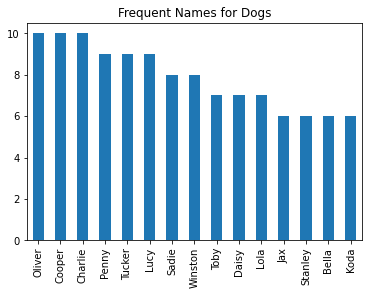

In [89]:
name_list.plot(kind='bar', title = 'Frequent Names for Dogs');

# Most commonly predicted breeds

In [94]:
breeds = df_image_predictions.p1.value_counts().head(10)

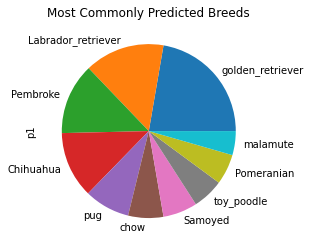

In [95]:
breeds.plot(kind='pie', title = 'Most Commonly Predicted Breeds');

# Distribution of Dog Stages

In [96]:
dog_stages_count = master['dog_stages'].value_counts()

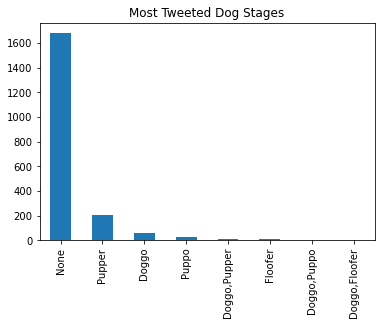

In [97]:
x = np.arange(8)
dog_stages_count.plot(kind = 'bar', title = 'Most Tweeted Dog Stages')
plt.xticks(x, ('None', 'Pupper', 'Doggo', 'Puppo', 'Doggo,Pupper', 'Floofer', 'Doggo,Puppo', 'Doggo,Floofer'));

# Retweet Count versus Favorite Count

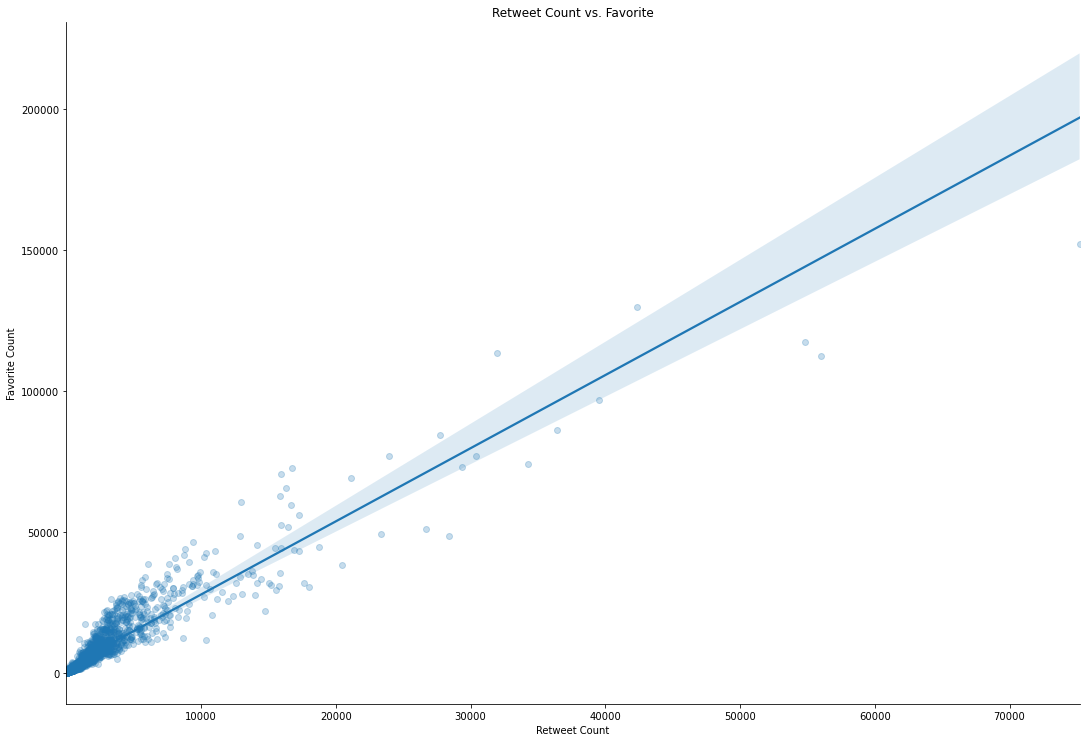

In [98]:
sns.lmplot(x = 'retweets', y = 'favorites', data = master, size = 10, aspect = 1.5, scatter_kws={'alpha':1/4})
plt.title('Retweet Count vs. Favorite')
plt.xlabel('Retweet Count')
plt.ylabel('Favorite Count');